In [1]:
#導入需要的Python庫

import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import datetime as dt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2020-08-19 01:13:23--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  25.8MB/s    in 0.4s    

2020-08-19 01:13:24 (25.8 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/usr/share/fonts/truetype/SimHei.ttf',size=14)
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/SimHei.ttf')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字型設定-黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決儲存影象是負號'-'顯示為方塊的問題
sns.set(font='SimHei') 

In [4]:
#從google drive 內讀取資料
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#將系統讀取的位置調整為google drive 所在的地方
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [6]:
#讀取資料
df1 = pd.read_csv('customer_order1.csv')

In [7]:
df1.head()

,time,order_type,order_id,user_id,receive_id,order_amount,order_product,line_id,line_type,category1,category2
0,2017/12/5 01:58,buy,3172,12787,12787,4750,1,NaN,NaN,product7,product7
1,2018/4/19 18:02,buy,5909,3453,3453,3975,1,NaN,NaN,product7,product7
2,2018/4/20 16:28,buy,5928,10687,10687,3975,1,NaN,NaN,product7,product7
3,2018/4/21 00:29,buy,5934,7831,7831,3975,1,01ac834b6d2c26b6458bff55259f4a219dbaff7607fd62...,finished,product7,product7
4,2018/4/23 22:05,buy,5989,11063,11063,3975,1,NaN,NaN,product7,product7


In [8]:
#總共有37891條資料，10個維度
df1.shape

(37891, 11)

敘述一下資料內容

time 訂單送出的時間

order_type 訂單狀態

order_id 訂單編號

user_id 訂單人的ID

receive_id 收穫人的ID

order_amount 產品的金額

order_product 產品的數量

line_id Line平台訂單

line_condition line平台訂單狀況

category 產品編號

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37891 entries, 0 to 37890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time           37891 non-null  object
 1   order_type     37891 non-null  object
 2   order_id       37891 non-null  object
 3   user_id        37891 non-null  int64 
 4   receive_id     37891 non-null  int64 
 5   order_amount   37891 non-null  int64 
 6   order_product  37891 non-null  int64 
 7   line_id        4913 non-null   object
 8   line_type      4913 non-null   object
 9   category1      37891 non-null  object
 10  category2      37891 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.2+ MB


In [10]:
df1.describe()

,user_id,receive_id,order_amount,order_product
count,37891.00000,37891.000000,37891.000000,37891.000000
mean,8867.94946,11888.030456,2111.056108,1.262648
std,4862.30713,5406.797010,1565.515162,1.038887
min,1.00000,3.000000,300.000000,1.000000
25%,4784.00000,7346.000000,1216.000000,1.000000
50%,8954.00000,11751.000000,1520.000000,1.000000
75%,13052.00000,16298.000000,2550.000000,1.000000
max,17269.00000,21966.000000,7980.000000,35.000000


In [11]:
1#新增每次消費每個產品的總額 數量*價格
df1['total']=df1.order_amount*df1.order_product

In [12]:
#針對時間段格式進行拆分，增加後續可能會用到的時間段包含'年'、'月'、'日'

df1['time'] = pd.to_datetime(df1['time'])
df1['order_date'] = df1['time'].dt.date
df1['year'] = df1['time'].dt.year
df1['month']=df1.time.values.astype('datetime64[M]')
df1['month1'] = df1['time'].dt.month
df1['day']=df1['time'].dt.day
df1['hour']=df1['time'].dt.hour
df1['weekday'] = df1['time'].apply(lambda x: pd.to_datetime(x).weekday())
def get_season(dt):
    dt = dt.date()
    if dt.month in [3,4,5]:
        return 'Spring'    # spring
    elif dt.month in [6,7,8]:
        return 'Summer'    # summer
    elif dt.month in [9,10,11]:
        return 'Fall'    # fall
    else:
        return 'Winter'
df1['season']=df1['time'].apply(get_season)
df1['month']=df1['month'].dt.strftime('%Y-%m')


In [13]:
df1.head()

,time,order_type,order_id,user_id,receive_id,order_amount,order_product,line_id,line_type,category1,category2,total,order_date,year,month,month1,day,hour,weekday,season
0,2017-12-05 01:58:00,buy,3172,12787,12787,4750,1,NaN,NaN,product7,product7,4750,2017-12-05,2017,2017-12,12,5,1,1,Winter
1,2018-04-19 18:02:00,buy,5909,3453,3453,3975,1,NaN,NaN,product7,product7,3975,2018-04-19,2018,2018-04,4,19,18,3,Spring
2,2018-04-20 16:28:00,buy,5928,10687,10687,3975,1,NaN,NaN,product7,product7,3975,2018-04-20,2018,2018-04,4,20,16,4,Spring
3,2018-04-21 00:29:00,buy,5934,7831,7831,3975,1,01ac834b6d2c26b6458bff55259f4a219dbaff7607fd62...,finished,product7,product7,3975,2018-04-21,2018,2018-04,4,21,0,5,Spring
4,2018-04-23 22:05:00,buy,5989,11063,11063,3975,1,NaN,NaN,product7,product7,3975,2018-04-23,2018,2018-04,4,23,22,0,Spring


In [16]:
#觀察order_type內含有哪些資料
df1.order_type.value_counts()

buy       36902
cancel      989
Name: order_type, dtype: int64

Text(0.5, 1.0, '取消率')

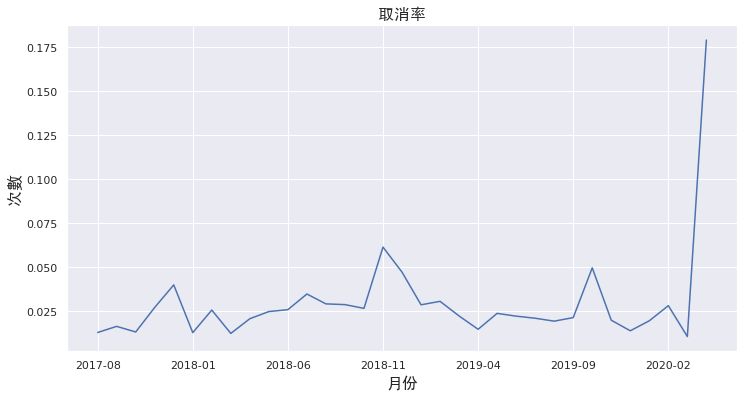

In [17]:
#將取消訂單的標示為1，購買為0，分析取消率為何
def order(a):
  if a=='cancel':
    return '1'
  else:
    return '0'
df1['cancel'] = df1.apply(lambda row:order(row['order_type']),axis=1).astype(int)
group_user=df1.groupby('month')
group_user.apply(lambda x:x.cancel.sum()/x.cancel.count()).plot(figsize=(12,6))
plt.xlabel('月份',fontproperties=zhfont,fontsize=16)
plt.ylabel('次數',fontproperties=zhfont,fontsize=16)
plt.title('取消率',fontproperties=zhfont,fontsize=16)

In [18]:
#觀察到只要包含已經購買與取消訂單的資料，這邊先以已經購買的資料為主在分析上，進行篩選
condition=df1["order_type"]=="buy"
df=df1[condition]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36902 entries, 0 to 36901
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           36902 non-null  datetime64[ns]
 1   order_type     36902 non-null  object        
 2   order_id       36902 non-null  object        
 3   user_id        36902 non-null  int64         
 4   receive_id     36902 non-null  int64         
 5   order_amount   36902 non-null  int64         
 6   order_product  36902 non-null  int64         
 7   line_id        4758 non-null   object        
 8   line_type      4758 non-null   object        
 9   category1      36902 non-null  object        
 10  category2      36902 non-null  object        
 11  total          36902 non-null  int64         
 12  order_date     36902 non-null  object        
 13  year           36902 non-null  int64         
 14  month          36902 non-null  object        
 15  month1         3690

In [20]:
#合併月份以利後續分析
grouped_month = df.groupby('month')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


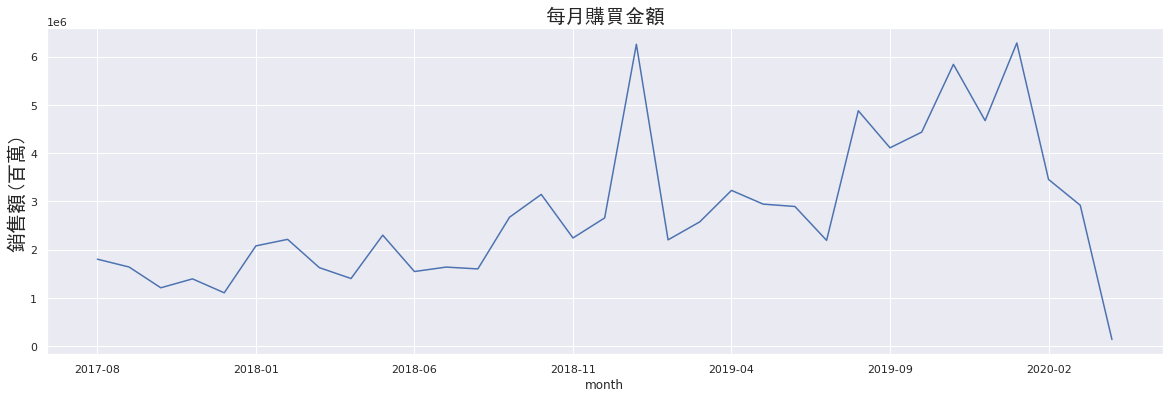

In [21]:
plt.figure(1, figsize=(20, 6))
plt.title('每月購買金額',fontproperties=zhfont,fontsize=20)
plt.ylabel('銷售額(百萬)',fontproperties=zhfont,fontsize=20)
grouped_month.total.sum().plot()
plt.show()

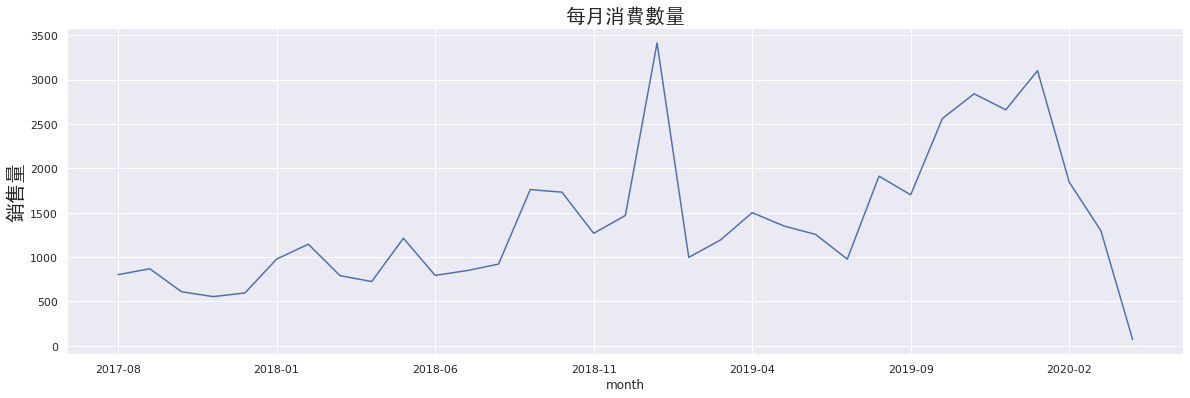

In [22]:
plt.figure(1, figsize=(20, 6))
plt.title('每月消費數量',fontproperties=zhfont,fontsize=20)
plt.ylabel('銷售量',fontproperties=zhfont,fontsize=20)
grouped_month.order_product.sum().plot()
plt.show()

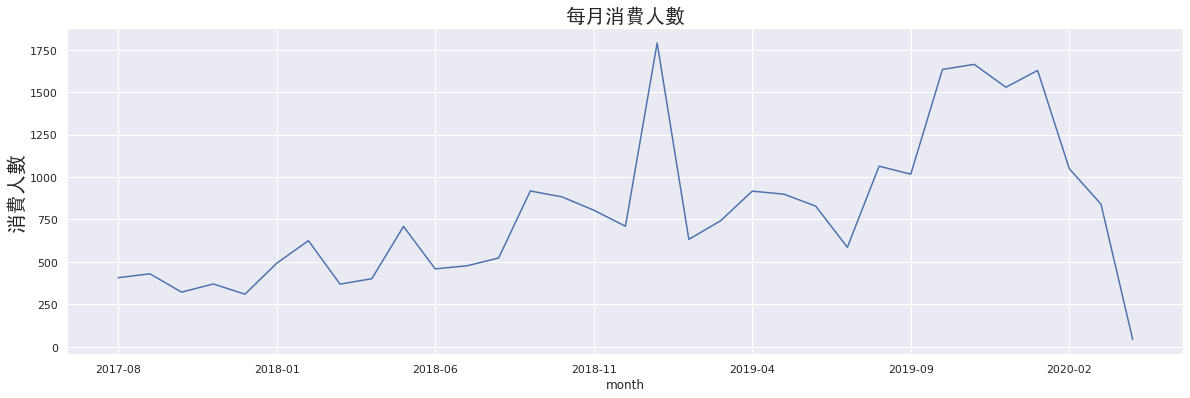

In [23]:
plt.figure(1, figsize=(20, 6))
plt.title('每月消費人數',fontproperties=zhfont,fontsize=20)
plt.ylabel('消費人數',fontproperties=zhfont,fontsize=20)
grouped_month.user_id.nunique().plot()

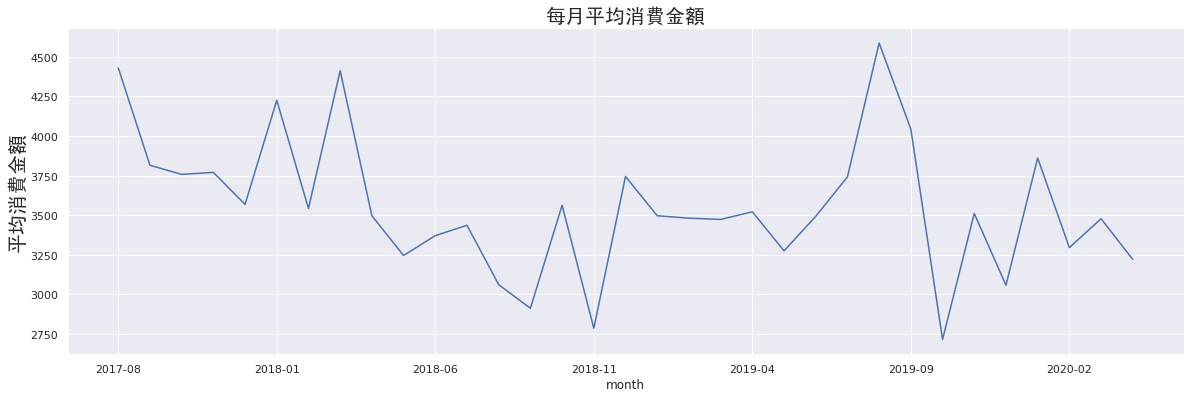

In [24]:
#平均每人消費金額
plt.figure(1, figsize=(20, 6))
plt.title('每月平均消費金額',fontproperties=zhfont,fontsize=20)
plt.ylabel('平均消費金額',fontproperties=zhfont,fontsize=20)
grouped_month.apply(lambda x:x.total.sum()/x.user_id.nunique()).plot()

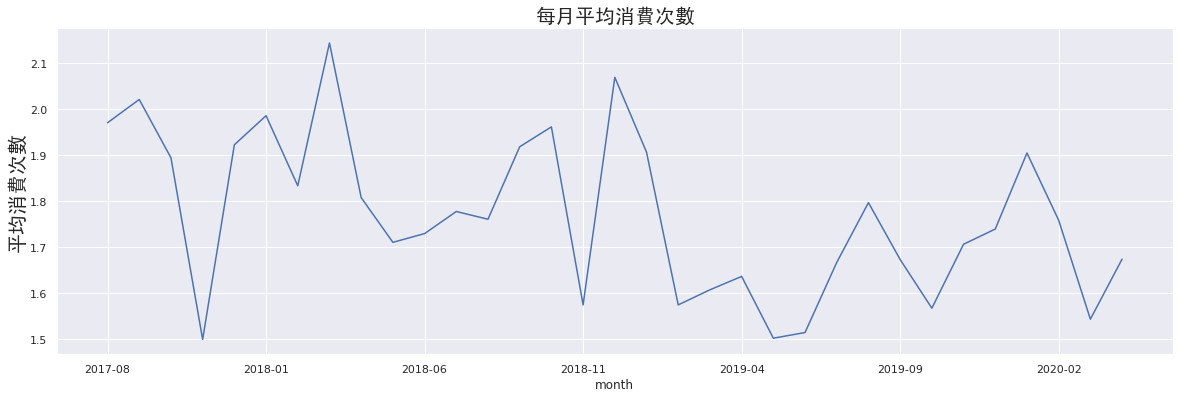

In [25]:
#平均每人消費金額
plt.figure(1, figsize=(20, 6))
plt.title('每月平均消費次數',fontproperties=zhfont,fontsize=20)
plt.ylabel('平均消費次數',fontproperties=zhfont,fontsize=20)
grouped_month.apply(lambda x:x.order_product.sum()/x.user_id.nunique()).plot()

# 整體消費趨勢小節


1.   觀察到此客戶從每年年初與9月，在銷售金額、人數、訂單量都有大幅成長，年初多為過年檔、9月為中秋檔期，顯示此客戶每年重要檔期在這兩段時間
2.   另外也發現到6-8整體銷售額較低，後續可在此段區間做一些優惠活動
3.   從平均每人購買金額上觀察到，銷售表現佳的月份平均消費金額較低，顯示此區段客戶有較高的折扣促使消費者購買產品
4.   從消費次數來看，平均消費次數的區間在[1.5-2.1]之間，在銷售額較多的區間並無提高銷售次數，顯示消費者一次購買量較大
5.   發現到2020-02月之後取消率大幅上升，需要去了解取消率上升原因，可能是頁面問題或是運輸問題。


In [26]:
grouped_user = df.groupby('user_id')
grouped_user.sum().describe()

,receive_id,order_amount,order_product,total,year,month1,day,hour,weekday,cancel
count,16602.000000,16602.000000,16602.000000,16602.000000,16602.000000,16602.000000,16602.000000,16602.000000,16602.000000,16602.0
mean,26417.858812,4690.870799,2.756053,5502.157993,4487.094687,14.469763,34.364534,31.942838,6.598904,0.0
std,29741.455861,5898.807355,4.015826,8172.366877,4669.292584,17.418353,39.770073,35.002492,7.999142,0.0
min,3.000000,300.000000,1.000000,300.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,10748.000000,1520.000000,1.000000,1650.000000,2019.000000,4.000000,12.000000,14.000000,2.000000,0.0
50%,17878.500000,2970.000000,2.000000,3135.000000,2020.000000,10.000000,23.000000,21.000000,5.000000,0.0
75%,31462.000000,5499.000000,3.000000,6270.000000,4040.000000,18.000000,42.000000,39.000000,8.000000,0.0
max,753667.000000,128248.000000,215.000000,326781.000000,100946.000000,363.000000,882.000000,611.000000,178.000000,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '用戶消費金額和消費次數的散點圖')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


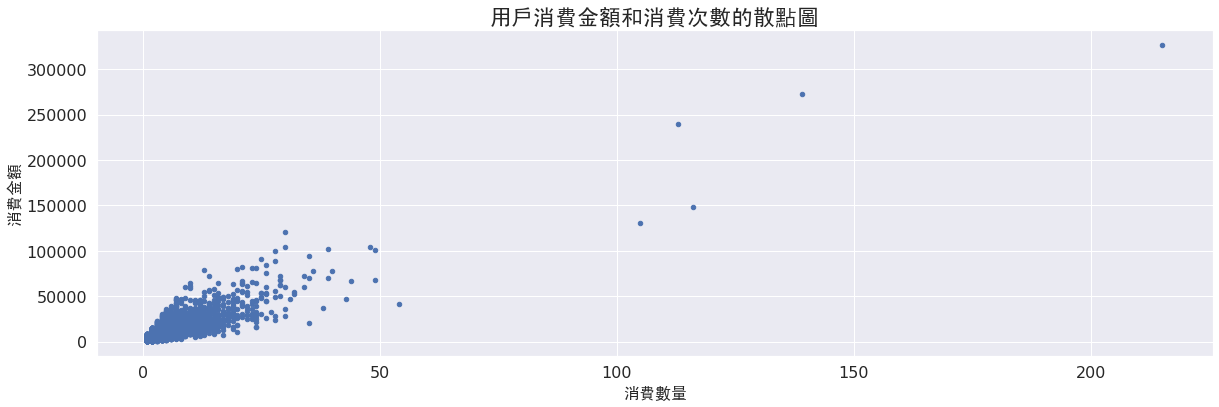

In [27]:
grouped_user.sum().plot.scatter(x='order_product',y='total',figsize=(20,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('消費數量',fontproperties=zhfont,fontsize=16)
plt.ylabel('消費金額',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額和消費次數的散點圖',fontproperties=zhfont,fontsize=22)

Text(0.5, 1.0, '用戶消費金額和消費次數的散點圖')

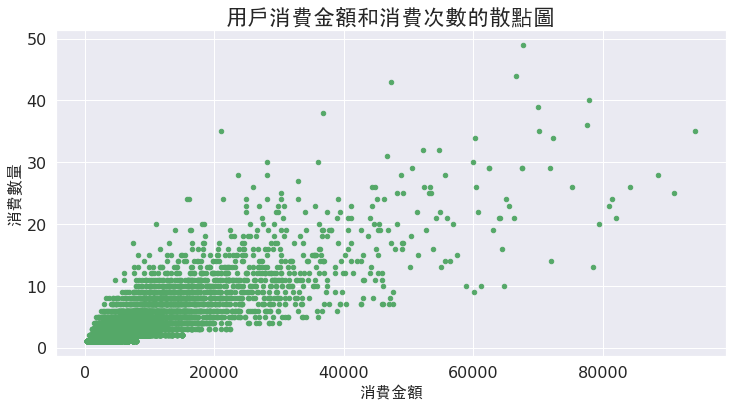

In [28]:
grouped_user.sum().query('total<100000').query('order_product<50').plot.scatter(x='total',y='order_product',color='g',figsize=(12,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('消費金額',fontproperties=zhfont,fontsize=16)
plt.ylabel('消費數量',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額和消費次數的散點圖',fontproperties=zhfont,fontsize=22)

Text(0.5, 1.0, '用戶消費金額分布圖')

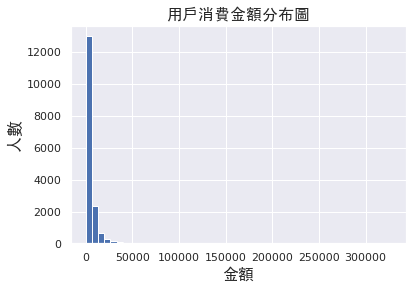

In [29]:
#用戶消費金額分布圖
grouped_user.sum().total.plot.hist(bins=50)
plt.xlabel('金額',fontproperties=zhfont,fontsize=16)
plt.ylabel('人數',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額分布圖',fontproperties=zhfont,fontsize=16)

Text(0.5, 1.0, '用戶消費金額分布圖(below70000)')

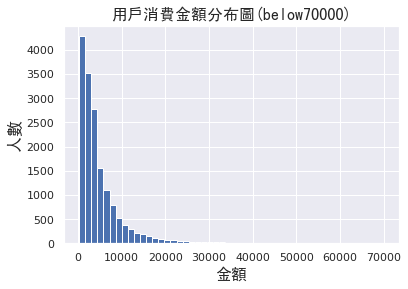

In [30]:
#用戶消費金額分布圖
grouped_user.sum().query('total<70000').total.plot.hist(bins=50)
plt.xlabel('金額',fontproperties=zhfont,fontsize=16)
plt.ylabel('人數',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額分布圖(below70000)',fontproperties=zhfont,fontsize=16)

Text(0.5, 1.0, '用戶消費金額分布圖')

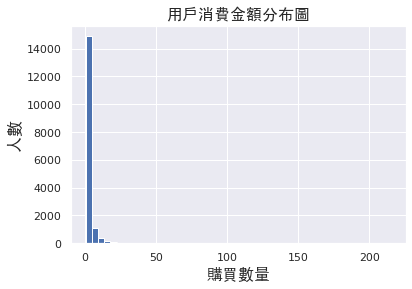

In [31]:
#用戶消費數量分布圖
grouped_user.sum().order_product.plot.hist(bins=50)
plt.xlabel('購買數量',fontproperties=zhfont,fontsize=16)
plt.ylabel('人數',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額分布圖',fontproperties=zhfont,fontsize=16)

Text(0.5, 1.0, '用戶消費金額分布圖(below20)')

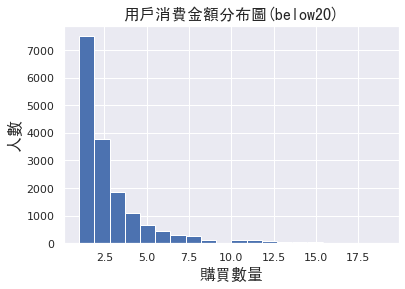

In [32]:
grouped_user.sum().query('order_product<20').order_product.plot.hist(bins=20)
plt.xlabel('購買數量',fontproperties=zhfont,fontsize=16)
plt.ylabel('人數',fontproperties=zhfont,fontsize=16)
plt.title('用戶消費金額分布圖(below20)',fontproperties=zhfont,fontsize=16)

Text(0.5, 1.0, '用戶累積業績百分比')

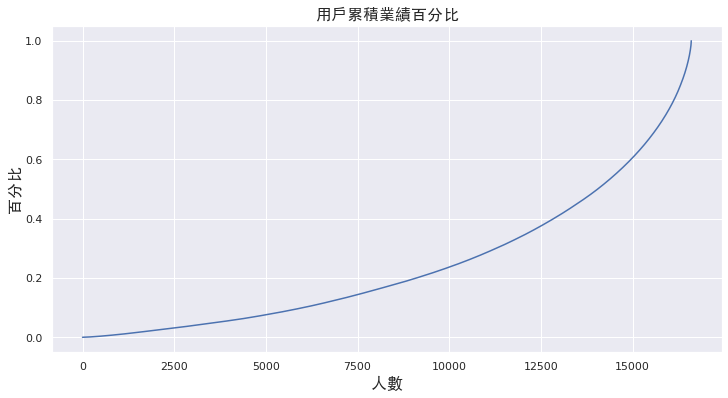

In [108]:
user_amounts =df.groupby('user_id').total.sum().sort_values().reset_index()
user_amounts['amount_cumsum']=user_amounts.total.cumsum()
amount_total=user_amounts.amount_cumsum.max()
user_amounts['prop']=user_amounts.apply(lambda x:x.amount_cumsum/amount_total,axis=1)
user_amounts

#畫圖
user_amounts.prop.plot(figsize=(12,6))
plt.xlabel('人數',fontproperties=zhfont,fontsize=16)
plt.ylabel('百分比',fontproperties=zhfont,fontsize=16)
plt.title('用戶累積業績百分比',fontproperties=zhfont,fontsize=16)

# 消費者個人行為小結


1.   個人消費金額屬於右偏分布，區間大概都在6000元內，且大部分都在10000內
2.   購買產品數量大多也都2次左右，顯示消費者回購情況不佳
3.   從用戶累積金額百分圖上看到，大概25%的高端消費者佔據整體約60%營收，符合所謂的28法則



[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'weekday'),
 Text(0.5, 1.0, 'User Count by hour')]

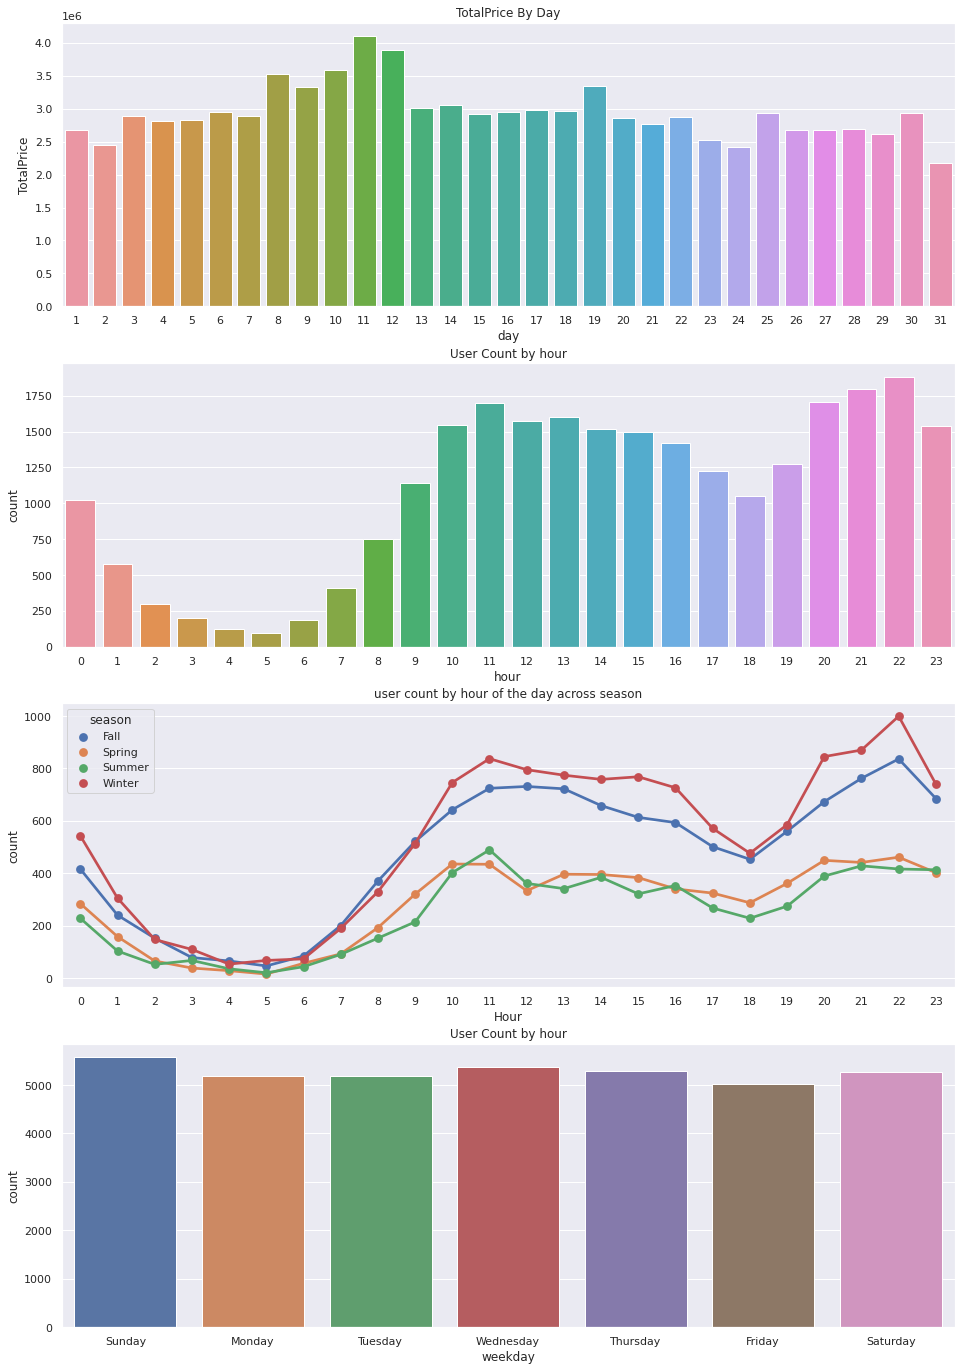

In [39]:

fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4)
fig.set_size_inches(16,24)

dayPrice = pd.DataFrame(df.groupby("day")["total"].sum()).reset_index()
sns.barplot(data=dayPrice,x="day",y="total",ax=ax1)#order=sortOrder
ax1.set(xlabel='day', ylabel='TotalPrice',title="TotalPrice By Day")

dayPrice = pd.DataFrame(df.groupby("hour")["user_id"].nunique()).reset_index()
sns.barplot(data=dayPrice,x="hour",y="user_id",ax=ax2)#order=sortOrder
ax2.set(xlabel='hour', ylabel='count',title="User Count by hour")


hourseasonprice=pd.DataFrame(df.groupby(["hour","season"],sort=True)['order_id'].count()).reset_index()
sns.pointplot(x=hourseasonprice["hour"],y=hourseasonprice["order_id"],hue=hourseasonprice['season'],data=hourseasonprice,join=True,ax=ax3)
ax3.set(xlabel='Hour',ylabel='count',title='user count by hour of the day across season',label='big')

weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
weekprice = pd.DataFrame(df.groupby("weekday")["user_id"].count()).reset_index()
weekprice["weekday"]=weekprice['weekday'].map(weekDict)
sns.barplot(data=weekprice,x="weekday",y="user_id",ax=ax4)#order=sortOrder
ax4.set(xlabel='weekday', ylabel='count',title="User Count by hour")

# 時間相關小結


1.   每個月的10-11號與19號有最多的營業額，可能通常月中有些活動
2.   消費時段意外的在中午有最多人消費，以及晚上10點時段，後續可以在這些時區間利用站內推播吸引更多用戶購買產品
3.   從季節上來看，與前面月份分析相同冬天靠近年尾表現最亮眼
4.   星期之中週日休假日訂單量自然而然最多，此外禮拜三有有不俗的購買人數後續假如平日想打活動可於週三執行




In [40]:
#複購率：當月購買多次人數占購買總人數的百分比，以"月"計算
pivoted_counts = df.pivot_table(index='user_id',columns='month',values='time',aggfunc='count').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
pivoted_rr=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_rr

,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
17267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


Text(0.5, 1.0, '複購率比例圖')

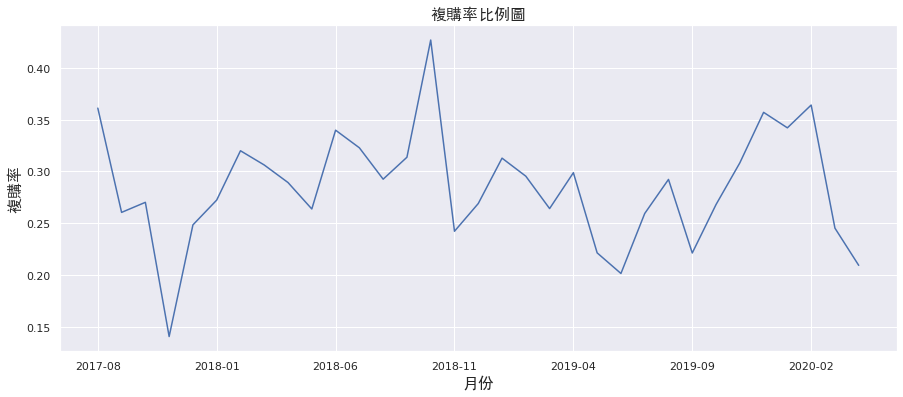

In [42]:
(pivoted_rr.sum()/pivoted_rr.count()).plot(figsize=(15,6))
plt.xlabel('月份',fontproperties=zhfont,fontsize=16)
plt.ylabel('複購率',fontproperties=zhfont,fontsize=16)
plt.title('複購率比例圖',fontproperties=zhfont,fontsize=16)


In [43]:
df_purchase = pivoted_counts.applymap(lambda x: 1 if x > 0 else 0)
df_purchase.head()

,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
def purchase_back(data):
  status=[]
  for i in range(32):
    if data[i]==1:
      if data[i+1] == 1:
        status.append(1)
      if data[i+1]==0:
        status.append(0)
    else:
      status.append(np.NaN)
  status.append(np.NaN)
  return pd.Series(status, index=columns_month)
pivoted_repurchase = df_purchase.apply(purchase_back, axis=1)
pivoted_repurchase.head(5)

,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


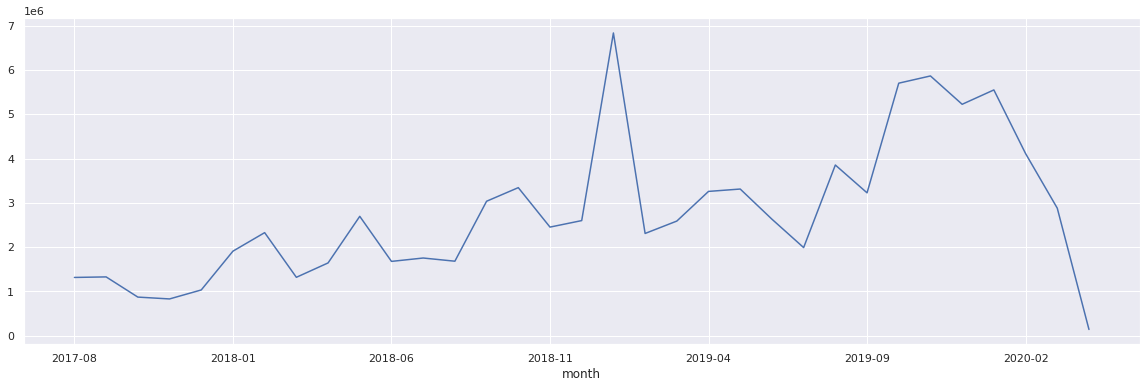

In [98]:
grouped_month.total.sum().plot(figsize=(20,6))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

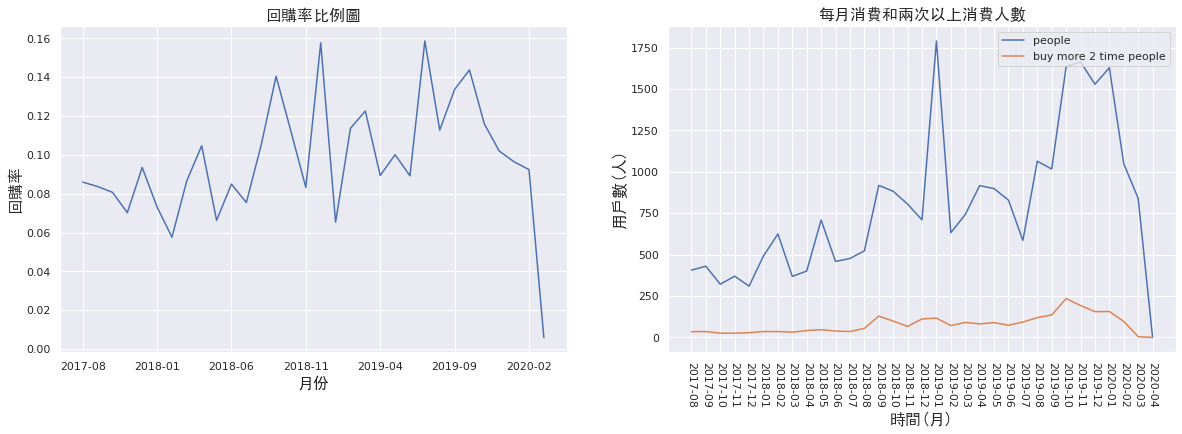

In [106]:
plt.subplot(121)
fig=(pivoted_repurchase.sum()/pivoted_repurchase.count()).plot(figsize=(20,6))
plt.xlabel('月份',fontproperties=zhfont,fontsize=16)
plt.ylabel('回購率',fontproperties=zhfont,fontsize=16)
plt.title('回購率比例圖',fontproperties=zhfont,fontsize=16)


plt.subplot(122)
plt.plot(pivoted_repurchase.count())
plt.plot(pivoted_repurchase.sum())
plt.xlabel('時間(月)',fontproperties=zhfont,fontsize=16) 
plt.ylabel('用戶數(人)',fontproperties=zhfont,fontsize=16) 
plt.title('每月消費和兩次以上消費人數',fontproperties=zhfont,fontsize=16)
legends = ['people', 'buy more 2 time people']
plt.legend(legends,loc = 'upper right')
plt.xticks(rotation=-90)

# 回購率與複購率小結
*   觀察到回購率起伏較大，大概2個月就會回購一次，通常只要當月回購率佳，隔月業績就會小幅上升推斷可能是消費者看到優惠就會多買一些
*   總體來看新客的質量還是較低，還是老客戶再撐業績，後續必須要想辦法帶入更佳的新客質量

*   因客戶為保養保健類型，可以觀察到2018的時候整體平均複購率為30%上下，但在10月左右達到高峰，但2019年整體除了年底其他時間皆低於30%，但趨勢跟每月數據分析基本吻合，整體波動跟行銷活動有較大的關係



In [47]:
def active_status(data):
    status = []
    for i in range(33):

        # 本月有消費
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')

        # 若本月無消費
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, index=columns_month)
purchase_stats = df_purchase.apply(active_status, axis = 1)
purchase_stats.head()



,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive
2,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive
3,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
4,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive
5,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [53]:
purchase_status_counts= purchase_stats.replace('unreg',np.NaN).apply(lambda x:x.value_counts()).T
purchase_status_counts

,active,new,return,unactive
2017-08,NaN,407.0,NaN,NaN
2017-09,35.0,395.0,NaN,372.0
2017-10,36.0,261.0,25.0,741.0
2017-11,26.0,293.0,51.0,986.0
2017-12,26.0,246.0,38.0,1292.0
2018-01,29.0,402.0,61.0,1512.0
2018-02,36.0,525.0,64.0,1904.0
2018-03,36.0,263.0,70.0,2423.0
2018-04,32.0,300.0,69.0,2691.0
2018-05,42.0,552.0,115.0,2935.0


Text(0.5, 0, 'order_date')

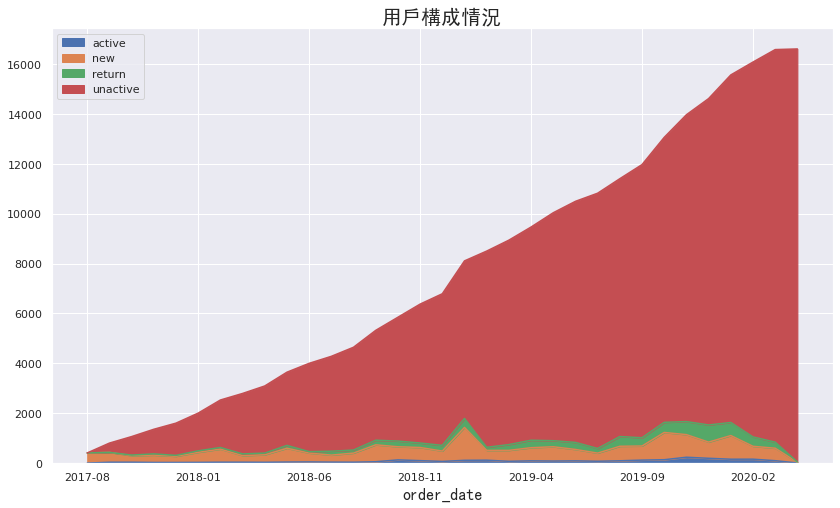

In [54]:
purchase_status_counts.plot(kind='area',figsize=(14,8))
plt.title('用戶構成情況',fontproperties=zhfont,fontsize=20)
plt.xlabel('order_date',fontproperties=zhfont,fontsize=16)

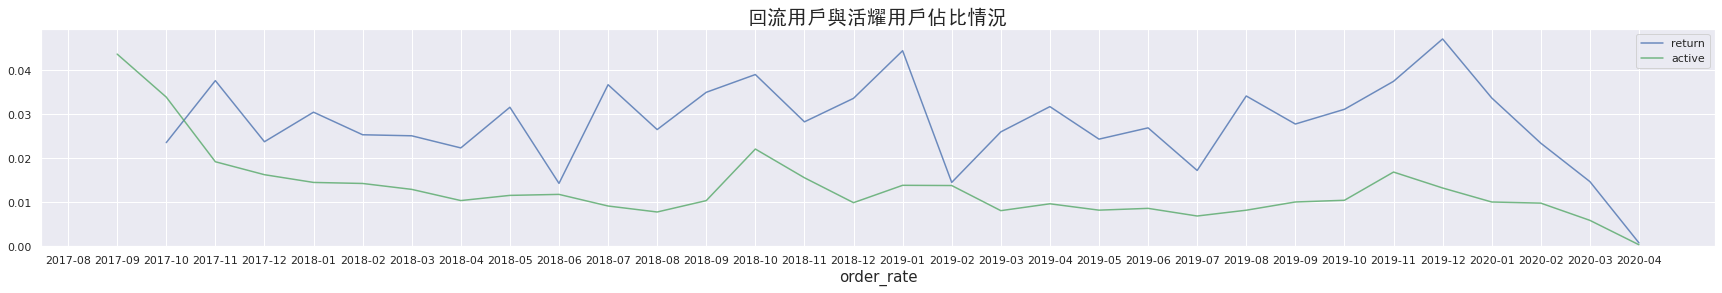

In [55]:
#歸一化處理
purchase_status_rate=purchase_status_counts.apply(lambda x:x/purchase_status_counts.sum(1))

plt.figure(figsize=(30,4))
plt.plot(purchase_status_rate.index,purchase_status_rate['return'],c='b',alpha=0.8,label='return')
plt.plot(purchase_status_rate.index,purchase_status_rate['active'],c='g',alpha=0.8,label='active')
plt.title('回流用戶與活耀用戶佔比情況',fontproperties=zhfont,fontsize=20)
plt.xlabel('order_rate',fontsize=15)
plt.ylim(0)
plt.legend()

# 用戶分層小結
*   觀察到新客持續都維持著一定的數量，活耀用戶比例並無明顯提高，顯示消費者購買後較無意願持續購買，或效果不如預期，回流用戶較起伏從趨勢來看也是因為有行銷活動才會回來購買產品




In [56]:
#用戶購買週期
df.sort_values(by='time',inplace=True)
user_od=df.groupby('user_id').apply(lambda x:x.time-x.time.shift(1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
user_od.describe()

count                       20300
mean      64 days 18:50:05.961576
std      116 days 19:13:09.552498
min               0 days 00:00:00
25%               0 days 00:00:00
50%               7 days 01:38:30
75%              75 days 02:59:15
max             906 days 23:38:00
Name: time, dtype: object

Text(0, 0.5, '數量')

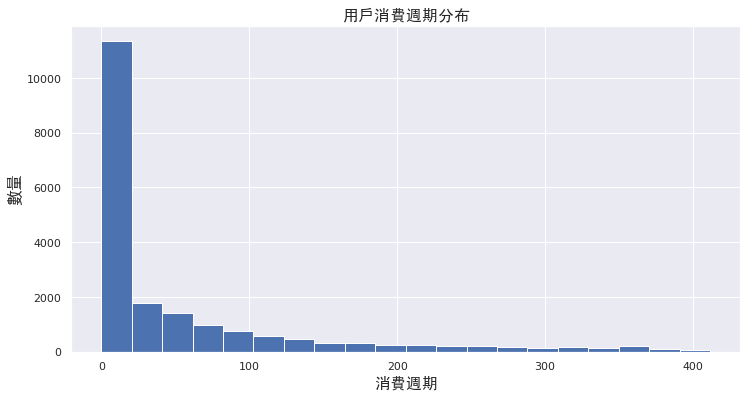

In [58]:
user_od_time=(user_od/np.timedelta64(1,'D'))
user_od_time[user_od_time<(64+3*116)].plot.hist(bins=20,figsize=(12,6))
plt.title('用戶消費週期分布',fontproperties=zhfont,fontsize=16)
plt.xlabel('消費週期',fontproperties=zhfont,fontsize=16)
plt.ylabel('數量',fontproperties=zhfont,fontsize=16)

In [59]:
#用戶生命週期：第一次消費至最後一次消費的時間差
firstdate = df.groupby('user_id')[['time']].min()
lastdate = df.groupby('user_id')[['time']].max()
life_time = lastdate-firstdate
life_time.describe()


,time
count,16602
mean,79 days 05:09:55.941452
std,173 days 00:17:04.386722
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,51 days 03:20:30
max,954 days 14:04:00


Text(0.5, 0, 'life_time(Days)')

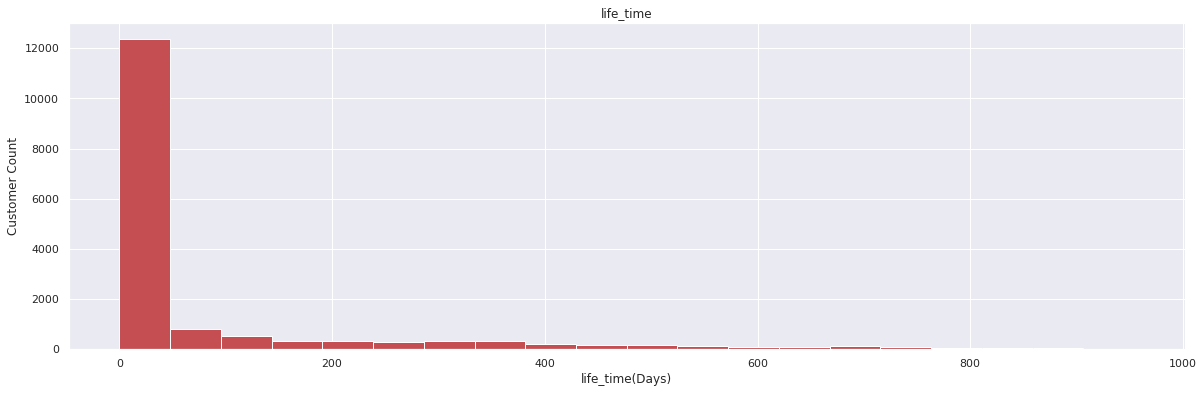

In [60]:
life_time['life_time']=life_time['time'].dt.days
life_time['life_time'].hist(bins=20,color='r',figsize=(20,6))
plt.title('life_time')
plt.ylabel('Customer Count')
plt.xlabel('life_time(Days)')

Text(0.5, 0, 'life_time(Days)')

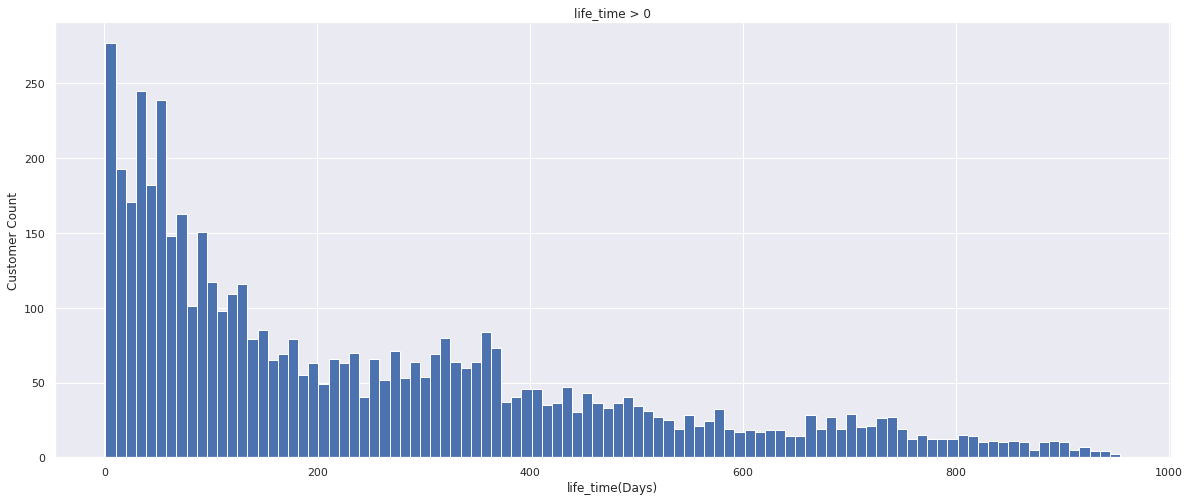

In [61]:
life_time[life_time['life_time']>0]['life_time'].hist(bins=100,figsize=(20,8),color='b')
plt.title('life_time > 0')
plt.ylabel('Customer Count')
plt.xlabel('life_time(Days)')

In [62]:
life_time[life_time['life_time']>0].life_time.describe()

count    5265.000000
mean      249.281861
std       227.558502
min         1.000000
25%        59.000000
50%       176.000000
75%       373.000000
max       954.000000
Name: life_time, dtype: float64

# 用戶購買與生命週期小結
*   觀察到消費週期的平均天數為68天，後續可嘗試當使用者購買第一次後馬上發送Email給客戶60天內的優惠券，吸引用戶持續購買
*   此外消費者的生命週期為79天，在消費者70天尚未購買二次產品的情況下也能提醒用戶持續光顧店家，通常流失的客戶要換回的機率較低，一定要把握這兩段區間


In [63]:
retention = df.merge(firstdate,on='user_id',suffixes=('','first'))
retention['Datediff'] = (retention['time'] - retention['timefirst']).dt.days
time_bins=[0,7,30,60,90,180,360]
retention['timediffbin']=pd.cut(retention['Datediff'],bins=time_bins)
retention['timediffbin'].value_counts()


(180, 360]    3562
(90, 180]     2605
(30, 60]      1837
(7, 30]       1499
(60, 90]      1249
(0, 7]         636
Name: timediffbin, dtype: int64

In [64]:
retention_pivot=retention.pivot_table(index=['user_id'],columns=['timediffbin'],values=['total'],aggfunc=np.sum,fill_value=0)
retention_pivot_t = retention_pivot.applymap(lambda x:1 if x>0 else 0)

In [114]:
retention_pivot_t.describe()

total               ...                          
timediffbin       (0, 7]      (7, 30]  ...    (90, 180]   (180, 360]
count        4768.000000  4768.000000  ...  4768.000000  4768.000000
mean            0.094799     0.211409  ...     0.329279     0.372693
std             0.292967     0.408351  ...     0.470001     0.483572
min             0.000000     0.000000  ...     0.000000     0.000000
25%             0.000000     0.000000  ...     0.000000     0.000000
50%             0.000000     0.000000  ...     0.000000     0.000000
75%             0.000000     0.000000  ...     1.000000     1.000000
max             1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 6 columns]

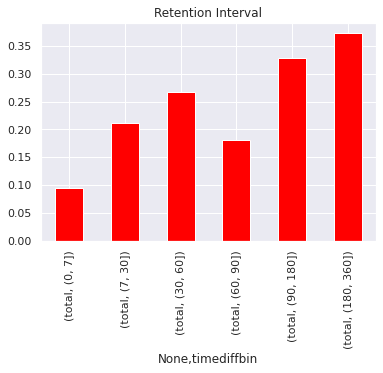

In [113]:
(retention_pivot_t.sum()/retention_pivot_t.count()).plot.bar(color='red',title='Retention Interval')


In [67]:
max_date=df.time.max()
rfm1 = df.pivot_table(index='user_id',values=['order_id','total','time'],aggfunc = {'order_id':'nunique','total':'sum','time':'max'})

In [68]:
rfm1['R']=(rfm1.time-max_date)/np.timedelta64(1,'D')

In [69]:
rfm1.rename(columns={'total':'M','order_id':'F'},inplace=True)

In [70]:
rfm = rfm1[['R','F','M']]

In [71]:
rfm.describe()

,R,F,M
count,16602.000000,16602.000000,16602.000000
mean,-343.659785,1.722021,5502.157993
std,260.999059,1.590211,8172.366877
min,-970.531250,1.000000,300.000000
25%,-522.095660,1.000000,1650.000000
50%,-285.875694,1.000000,3135.000000
75%,-115.398264,2.000000,6270.000000
max,0.000000,32.000000,326781.000000


In [72]:
def customer_label(x):
  label=x.R+x.F+x.M
  d={
    '111':'重要價值客户',
    '011':'重要喚回客户',
    '101':'重要發展客户',
    '001':'重要挽留客户',
    '110':'潛力客戶',
    '100':'新客戶',
    '010':'一般維持客戶',
    '000':'流失客戶'
  }
  result = d[label]
  return result

rfm['label'] = rfm.apply(lambda x: x-x.median(),axis=0).applymap(lambda x: str(1) if x>0 else str(0)).apply(customer_label,axis=1)
rfm.head()

,R,F,M,label
user_id,,,,
1,-126.431944,1,2880,新客戶
2,-169.543750,3,6450,重要價值客户
3,-238.166667,1,2880,新客戶
4,-186.729861,1,1500,新客戶
5,-463.727083,1,2125,流失客戶


In [73]:
rfm_interval=rfm.pivot_table(index='label',values='R',aggfunc='mean').rename(columns={'R':'消費間隔'})

differ_sum=rfm.groupby('label')['M'].sum()
rfm_table2=rfm.pivot_table(index='label',values=['R','F','M','R'],aggfunc={'R':'count','F':'mean','M':'mean'}).rename(columns={'F':'人均購買次數','M':'人均購買金額','R':'人數'})
rfm_table2['消費間隔']=rfm_interval
rfm_table2['累計消費總額'] = differ_sum
rfm_table2

,人均購買次數,人均購買金額,人數,消費間隔,累計消費總額
label,,,,,
一般維持客戶,2.026432,2588.806167,227,-535.214920,587659
新客戶,1.000000,1817.559462,3271,-130.066544,5945237
流失客戶,1.000000,1846.581750,4526,-564.868021,8357629
潛力客戶,2.016529,2731.022039,363,-126.154327,991361
重要價值客户,3.650632,12789.100216,3243,-117.628213,41475052
重要喚回客户,2.673065,9274.913017,1667,-502.798116,15461280
重要挽留客户,1.000000,5535.365231,1881,-613.878627,10412022
重要發展客户,1.000000,5699.850421,1424,-127.649699,8116587


# RFM小結
*   將近一半的客戶屬於新客戶與流失客戶這部分的人，消費次數少金額也較低，建議這部分搭配前面說的，購買一次即贈送小額優惠誘發第二次消費的時間點
*   重要價值客戶購買次數多，金額非常高顯示有部分人士非常喜愛產品一次購買不是送人就是大量囤貨，建議重要價值客戶可以開一個Line群組未來有新品優惠可以優先測試，或者是找來做素人KOL計畫，透過素材建議增加更多人對品牌的印象
*   其他重要喚回、挽留、發展就是可以定期每月遞送優惠券給這些客戶，這些人買的金額都較高，顯示有發展的潛力有把握好這群人




In [75]:
#第二種算法
rfm2 = df.pivot_table(index='user_id',values=['order_id','total','time'],aggfunc = {'order_id':'nunique','total':'sum','time':'max'})

rfm2['time'] = -(rfm2.time - rfm2.time.max()) / np.timedelta64(1, 'D')
rfm2.rename(columns={'time':'R', 'order_id':'F', 'total':'M'}, inplace = True)
krfm=rfm2
rfm2.head()


,F,R,M
user_id,,,
1,1,126.431944,2880
2,3,169.543750,6450
3,1,238.166667,2880
4,1,186.729861,1500
5,1,463.727083,2125


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


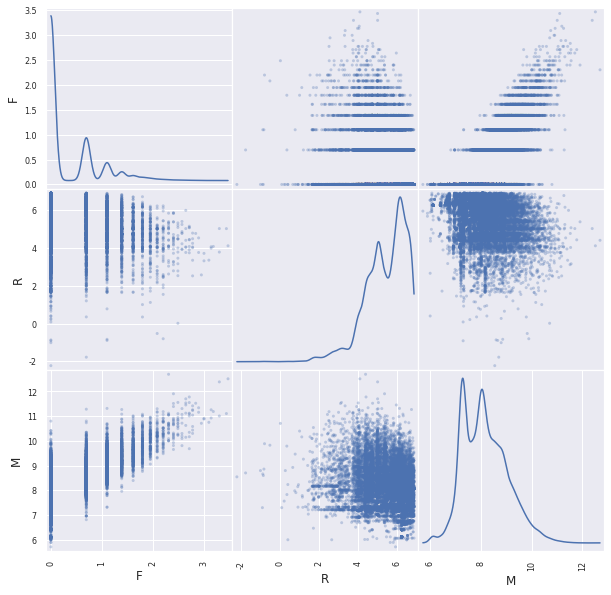

In [76]:
rfm2 = rfm2[rfm != 0].dropna()
log_rfm = np.log(rfm2)
pd.plotting.scatter_matrix(log_rfm, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

In [77]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x > 0 else '0')
    label = level.R + level.F + level.M
    d = {
    '111':'重要價值客户',
    '011':'重要喚回客户',
    '101':'重要發展客户',
    '001':'重要挽留客户',
    '110':'潛力客戶',
    '100':'新客戶',
    '010':'一般維持客戶',
    '000':'流失客戶'
    }
    result = d[label]
    return result

log_rfm['label'] = log_rfm[['R','F','M']].apply(lambda x:x-x.median()).apply(rfm_func, axis=1)
log_rfm.groupby('label').sum()

,F,R,M
label,,,
一般維持客戶,253.927434,1695.321615,2870.463978
新客戶,0.000000,28441.235888,33617.099678
流失客戶,0.000000,15231.071562,24375.063436
潛力客戶,159.777201,1415.997839,1778.380449
重要價值客户,1535.704464,10287.009653,14915.257955
重要喚回客户,3735.066055,14719.472558,29716.586635
重要挽留客户,0.000000,6454.942554,12192.101947
重要發展客户,0.000000,11954.657868,16046.426080


In [78]:
log_rfm.head()

,F,R,M,label
user_id,,,,
1,0.000000,4.839704,7.965546,流失客戶
2,1.098612,5.133111,8.771835,重要喚回客户
3,0.000000,5.472971,7.965546,流失客戶
4,0.000000,5.229663,7.313220,流失客戶
5,0.000000,6.139296,7.661527,新客戶


In [79]:
rfm_interval=log_rfm.pivot_table(index='label',values='R',aggfunc='mean').rename(columns={'R':'消費間隔'})

differ_sum=log_rfm.groupby('label')['M'].sum()
rfm_table3=log_rfm.pivot_table(index='label',values=['R','F','M','R'],aggfunc={'R':'count','F':'mean','M':'mean'}).rename(columns={'F':'人均購買次數','M':'人均購買金額','R':'人數'})
rfm_table3['消費間隔']=rfm_interval
rfm_table3['累計消費總額'] = differ_sum
rfm_table3

,人均購買次數,人均購買金額,人數,消費間隔,累計消費總額
label,,,,,
一般維持客戶,0.699525,7.907614,363,4.670307,2870.463978
新客戶,0.000000,7.429193,4525,6.285356,33617.099678
流失客戶,0.000000,7.449592,3272,4.654973,24375.063436
潛力客戶,0.703864,7.834275,227,6.237876,1778.380449
重要價值客户,0.921238,8.947365,1667,6.170972,14915.257955
重要喚回客户,1.152087,9.166128,3242,4.540244,29716.586635
重要挽留客户,0.000000,8.561869,1424,4.532965,12192.101947
重要發展客户,0.000000,8.530795,1881,6.355480,16046.426080


In [80]:
from sklearn.cluster import KMeans

kmrfm=rfm
def zscore_data(data):
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    data.columns = ['Z' + i for i in data.columns]
    return data
kmeans_model=kmrfm[['R','F','M']]
data = zscore_data(kmeans_model)
iteration=500
kmeansmodel = KMeans(n_clusters = 4, n_jobs = -1,max_iter = iteration)
kmeansmodel.fit(data) 
r1 = pd.Series(kmeansmodel.labels_).value_counts()
r2 = pd.DataFrame(kmeansmodel.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['類別數目']
# print(r)
# r.to_excel(classoutfile,index=False)
r = pd.concat([data, pd.Series(kmeansmodel.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['cluster_catalog']
print(kmeansmodel.cluster_centers_)
print(kmeansmodel.labels_)
r.head()

[[-1.0888733  -0.32101779 -0.24352018]
 [ 0.67307246 -0.2150674  -0.19984074]
 [ 0.62334398  1.77045024  1.37794853]
 [ 0.8819462   6.22802741  6.53699215]]
[1 1 1 ... 1 1 2]


,ZR,ZF,ZM,cluster_catalog
user_id,,,,
1,0.832294,-0.454041,-0.320857,1
2,0.667114,0.803653,0.115981,1
3,0.404190,-0.454041,-0.320857,1
4,0.601266,-0.454041,-0.489718,1
5,-0.460030,-0.454041,-0.413241,0


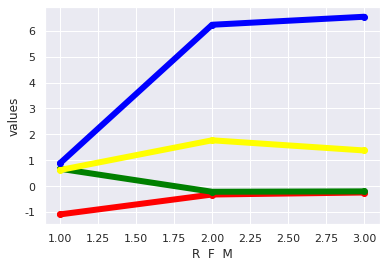

In [81]:
cluter = kmeansmodel.cluster_centers_  
x = [1,2,3]  
colors = ['red','green','yellow','blue']  
for i in range(4):  
   plt.plot(x,cluter[i],label='clustre '+str(i),linewidth=6,color=colors[i],marker='o')   
plt.xlabel('R  F  M')  
plt.ylabel('values')  
plt.show() 

In [82]:
df_all = df.merge(rfm['label'],how='inner',on='user_id')


In [83]:
product_rfm=df_all.pivot_table(index='category2',columns='label',values='time',aggfunc='count').fillna(0).apply(lambda x:100 *x /float(x.sum())).round(2).astype(str)+'%'

In [84]:
product_rfm

label,一般維持客戶,新客戶,流失客戶,潛力客戶,重要價值客户,重要喚回客户,重要挽留客户,重要發展客户
category2,,,,,,,,
product1,14.52%,9.87%,8.78%,9.64%,8.22%,8.34%,7.17%,6.72%
product11,12.47%,10.52%,9.96%,5.22%,8.24%,7.84%,5.98%,10.2%
product12,0.0%,24.9%,0.0%,37.75%,11.59%,0.0%,0.0%,11.09%
product2,6.95%,5.12%,16.5%,2.14%,11.34%,19.7%,29.97%,11.75%
product4,39.67%,21.79%,34.37%,20.62%,25.61%,35.65%,30.34%,14.02%
product6,15.54%,14.17%,16.69%,17.4%,15.09%,11.51%,9.21%,17.9%
product7,1.43%,6.82%,1.3%,5.22%,5.76%,2.41%,3.5%,11.53%
product8,6.34%,4.48%,8.46%,0.94%,10.38%,11.14%,11.11%,13.89%
product9,3.07%,2.33%,3.94%,1.07%,3.79%,3.4%,2.72%,2.89%


# 商品、RFM分析小結
*   觀察到重要類型的客戶對於"產品四"的愛好程度較高，顯示大家對這個產品有較佳的滿意度，所以後續舊客活動可以以此作為出發點發想行銷活動
*   另外新客戶部分觀察到對於"產品十二"有較高的偏好度，顯示此產品是最近上市且受到近期消費者的愛戴，若後續想要將新客逐漸轉換成重要類型客戶，建議可以做產品組合包裝例如購買"產品十二"就贈送少量"產品四"的試用包吸引消費者興趣




In [85]:
def send(a, b):
  if a==b:
    return '0'
  else:
    return '1'
df['send'] = df.apply(lambda row:send(row['user_id'], row['receive_id']),axis=1).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
gg_user = df.groupby('month')

Text(0.5, 1.0, '贈送率百分比')

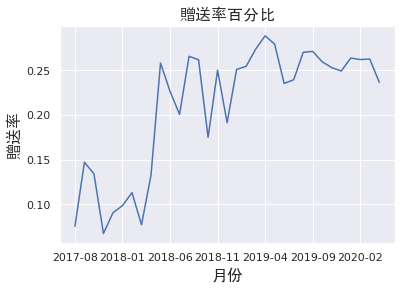

In [87]:
gg_user.apply(lambda x:x.send.sum()/x.send.count()).plot()
plt.xlabel('月份',fontproperties=zhfont,fontsize=16)
plt.ylabel('贈送率',fontproperties=zhfont,fontsize=16)
plt.title('贈送率百分比',fontproperties=zhfont,fontsize=16)

In [88]:
df['line_type']=df['line_type'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df.head()

,time,order_type,order_id,user_id,receive_id,order_amount,order_product,line_id,line_type,category1,category2,total,order_date,year,month,month1,day,hour,weekday,season,cancel,send
26643,2017-08-09 12:52:00,buy,1019R1,16794,16794,1520,1,NaN,0,product4,product4,1520,2017-08-09,2017,2017-08,8,9,12,2,Summer,0,0
7090,2017-08-09 16:06:00,buy,1020,12169,12169,2375,1,NaN,0,product8,product8,2375,2017-08-09,2017,2017-08,8,9,16,2,Summer,0,0
10658,2017-08-09 16:06:00,buy,1020,12169,12169,3135,1,NaN,0,product2,product2,3135,2017-08-09,2017,2017-08,8,9,16,2,Summer,0,0
26644,2017-08-09 17:20:00,buy,1021,9835,9835,1760,2,NaN,0,product4,product4,3520,2017-08-09,2017,2017-08,8,9,17,2,Summer,0,0
10659,2017-08-09 19:41:00,buy,1022,15293,15293,899,1,NaN,0,product2,product2,899,2017-08-09,2017,2017-08,8,9,19,2,Summer,0,0


In [90]:
#觀察line_type變數有哪一些
df.line_type.value_counts()

0           32144
finished     4707
created        51
Name: line_type, dtype: int64

In [91]:
#只要是finished 就是1其他是0
def line(a):
  if a=='finished':
    return '1'
  else:
    return '0'
df['line'] = df.apply(lambda row:line(row['line_type']),axis=1).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'line使用率')

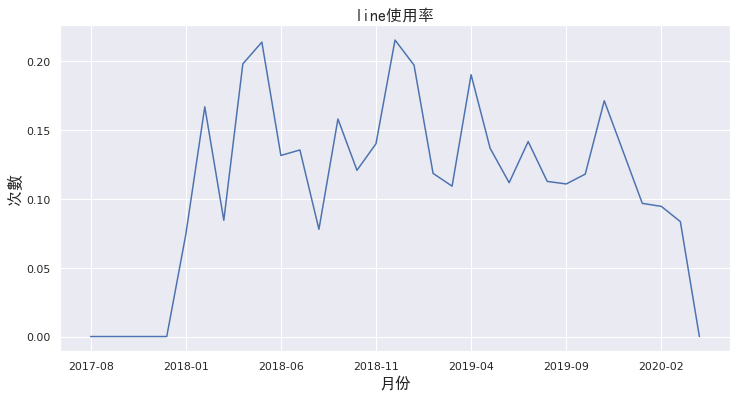

In [92]:
gg_user.apply(lambda x:x.line.sum()/x.line.count()).plot(figsize=(12,6))
plt.xlabel('月份',fontproperties=zhfont,fontsize=16)
plt.ylabel('次數',fontproperties=zhfont,fontsize=16)
plt.title('line使用率',fontproperties=zhfont,fontsize=16)

# 總結
*   取消率近期飆升，需要找出原因查看是否是購買流程有問題或者付款方式出了問題

*   把握每日最多人購買時段的前一小時，根據統計每日最多人購買時段在上午11點與晚上10點，可於這兩段時間前發送網站推波優惠，刺激消費者購買產品

*   夏天時段活動規劃，觀察到主要業績來源集中在冬天，中秋、過年或雙11檔期，夏天區間明顯較差，建議可找出較符合夏天類型的產品，以此作為活動的主軸以利提升整體業績

*   新客戶的刺激，每月雖帶入一定流量的新客戶但觀察到活耀用戶的比例並未提升，顯示多數消費者購買一次後並無較高意願主動購買第二次，都是靠著活動有較大的折扣才願意購買，建議後續只要偵測到新客可搭配消費者購買週期為69天的依據，發送60天內的優惠券刺激首次購買後的消費者的購買慾望

*  消費者生命週期為79天，代表大多消費者若無在79天消費者就不會再購買商品，可發想一些較高的誘因使消費者回鍋購買產品

*  重要價值客戶此類別客戶含金量較高，可做persona的輪廓分析找出潛在消費者輪廓以利後續新客的引入，此外也可收集此類型客戶對於網站還有結帳流程的體驗經驗優化網站，另外也可透過此類型客戶做素人KOL計畫，擴散更多客群

*  新客戶對於product12有較高的購買意願，大多客戶對product4有較高的偏好度，所以可推測product4為明星商品，但這是一體兩面風險較高，建議後續可培養product12作為第二個明星產品以利整體消費者對於品牌的黏著度

*  發現到有越來越多消費者訂購產品後收件人並不是本人，消費者喜歡將此品牌產品當作禮品贈送，建議後續可嘗試根據此發想行銷活動，例如：送禮大好康只要購買XXX商品定給某人即可加送某些商品等方式

*  發現多有部分消費者喜歡使用line訂購產品，所以line官方帳號的經營顯得重要，建議後續可透過line@推送訊息提高消費者對品牌的印象